# Checking Baseline with AutoML

In [1]:
%config InlineBackend.figure_format='retina'
import logging
import warnings
from ekorpkit import eKonf

logging.basicConfig(level=logging.WARNING)
warnings.filterwarnings('ignore')
print(eKonf.__version__)

0.1.32+16.gc607689.dirty


In [2]:
data_dir = "../data/fomc"

## Load a feature set

In [3]:
fs_cfg = eKonf.compose(config_group="dataset=feature")
fs_cfg.name = "fomc_features_small"
fs_cfg.data_dir = data_dir
fs_fomc = eKonf.instantiate(fs_cfg)

## Auto ML

In [4]:
model_cfg = eKonf.compose(config_group='model/automl=classification')
model_cfg.dataset = fs_cfg
model_cfg.config.time_budget = 600
model_cfg.verbose = False
model = eKonf.instantiate(model_cfg)

In [4]:
model.fit()

Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 4, 'max_features': 0.6336706494056755, 'max_leaves': 7, 'criterion': 'entropy'}
Best accuracy on validation data: 0.6849
Training duration of best run: 0.1748 s


In [5]:
model.best_estimator

RandomForestClassifier(criterion='entropy', max_features=0.6336706494056755,
                       max_leaf_nodes=7, n_estimators=4, n_jobs=-1)

In [6]:
model.save()

In [5]:
model.load()

In [6]:
model.show_results()

Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 4, 'max_features': 0.6336706494056755, 'max_leaves': 7, 'criterion': 'entropy'}
Best accuracy on validation data: 0.6849
Training duration of best run: 0.1748 s


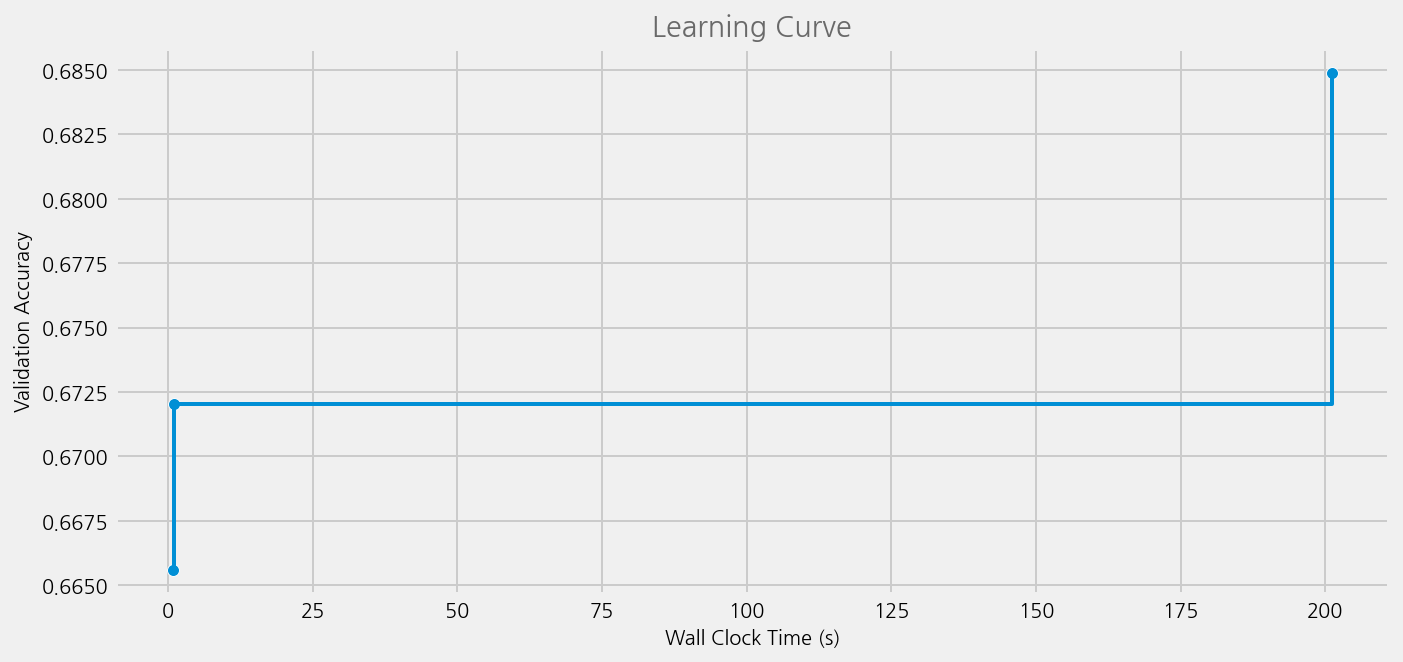

In [7]:
model.plot_learning_curve()

r2 = -0.37118039398169733
mse = 0.8173076923076923
mae = 0.49038461538461536
Accuracy:  0.6730769230769231
Precison:  0.5528554778554778
Recall:  0.6730769230769231
F1 Score:  0.5743400621118012
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         Cut       0.60      0.17      0.26        18
        Hike       0.00      0.00      0.00        17
        Hold       0.68      0.97      0.80        69

    accuracy                           0.67       104
   macro avg       0.43      0.38      0.35       104
weighted avg       0.55      0.67      0.57       104



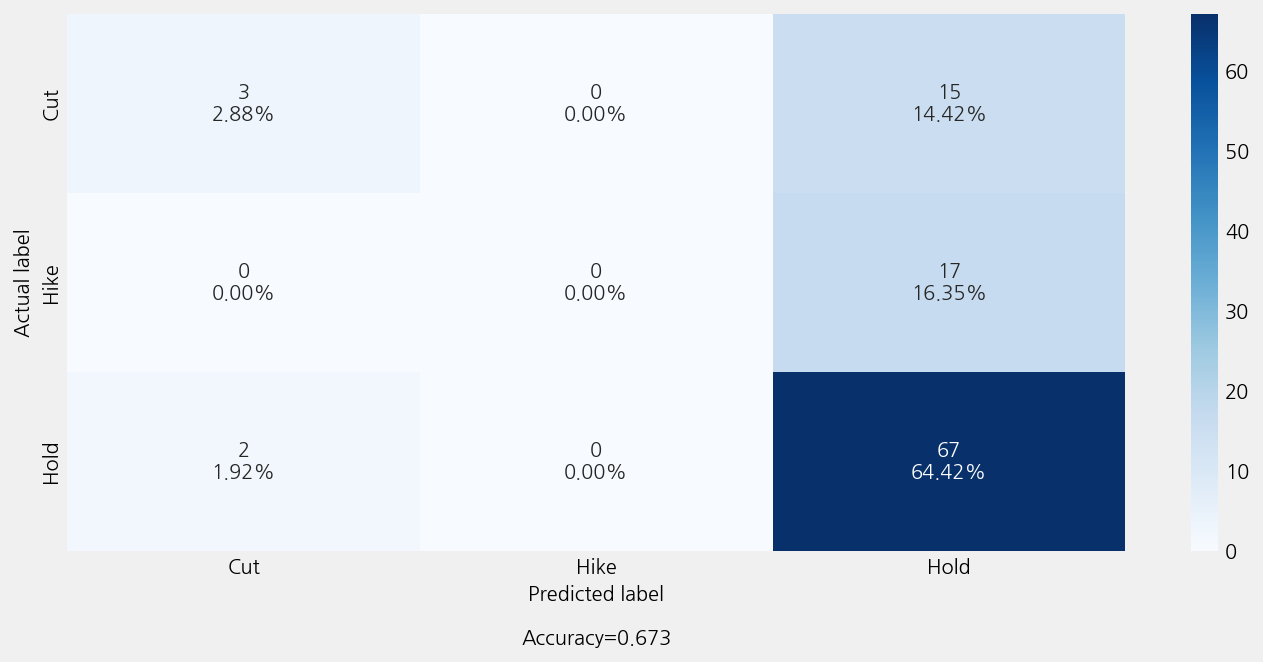

In [8]:
model.eval()

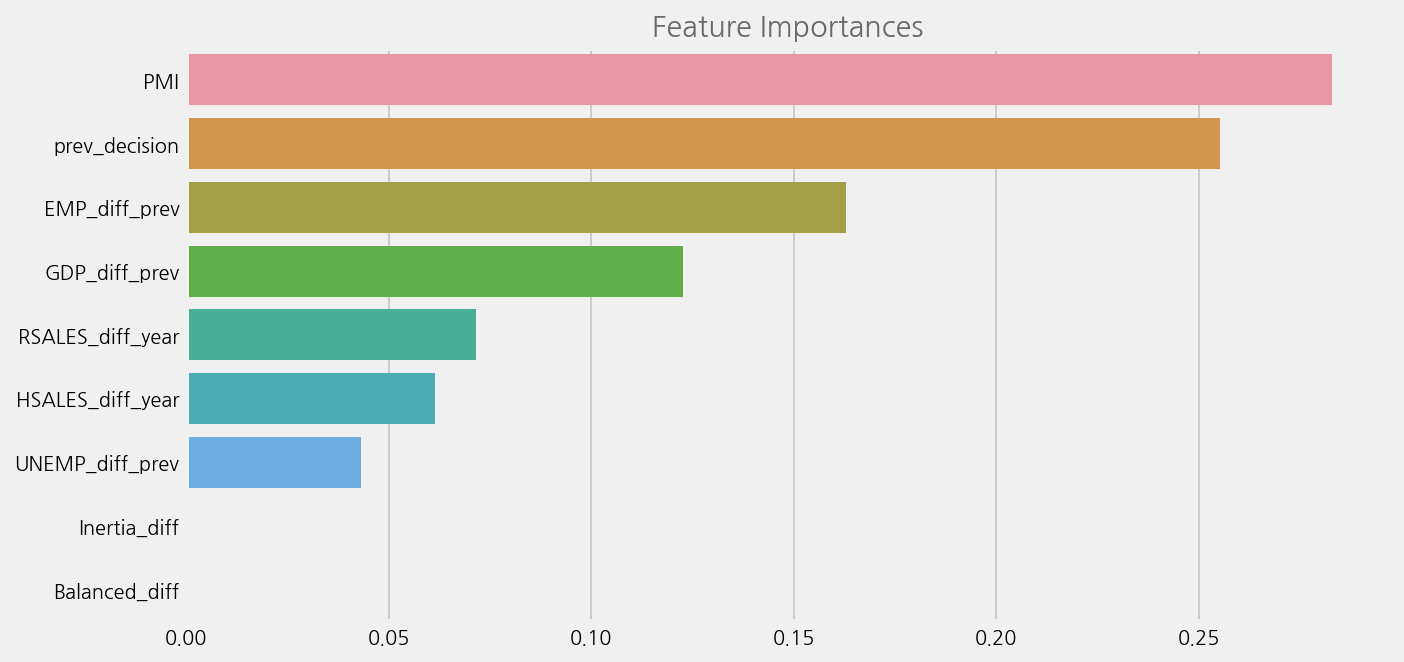

In [9]:
model.plot_feature_importance()